In [13]:
#! -*- coding: UTF8 -*-
import os
os.chdir(os.getcwd())

## Import Module

In [14]:
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

## Import Data

In [16]:
df_train = pd.read_excel('process_data/part3_happiness.xlsx',sheet_name="TrainData")[["life_expectancy","gdp","Social support","Happiness"]].fillna(0)
df_train.head()

,life_expectancy,gdp,Social support,Happiness
0,62.966,2.049713e+10,0.525568,0
1,77.813,1.322815e+10,0.625587,0
2,75.878,2.138100e+11,0.818189,2
3,58.776,1.457120e+11,0.754615,0
4,75.913,5.263200e+11,0.917870,2


In [17]:
df_country = pd.read_excel('process_data/part3_happiness.xlsx',sheet_name="TestData")[["country"]]
df_country.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Argentina
4,Armenia


In [18]:
df_test = pd.read_excel('process_data/part3_happiness.xlsx',sheet_name="TestData")[["life_expectancy","gdp","Social support","Happiness"]].fillna(0)
df_test.head()

,life_expectancy,gdp,Social support,Happiness
0,64.130,1.875347e+10,0.490880,0
1,78.333,1.301969e+10,0.637698,0
2,76.499,1.700970e+11,0.806754,1
3,76.372,6.436290e+11,0.906699,1
4,74.797,1.152746e+10,0.697925,0


In [19]:
list1 = list(df_train.columns)
list1

['life_expectancy', 'gdp', 'Social support', 'Happiness']

## Decision Tree

In [20]:
X_train = df_train[list1[:-1]]
y_train = df_train[list1[-1]]
X_test = df_test[list1[:-1]]
y_test = df_test[list1[-1]]

In [21]:
# Can change value of random_state on your own
random_state_val = 99
model=DecisionTreeClassifier(random_state=random_state_val)
model=model.fit(X_train,y_train)

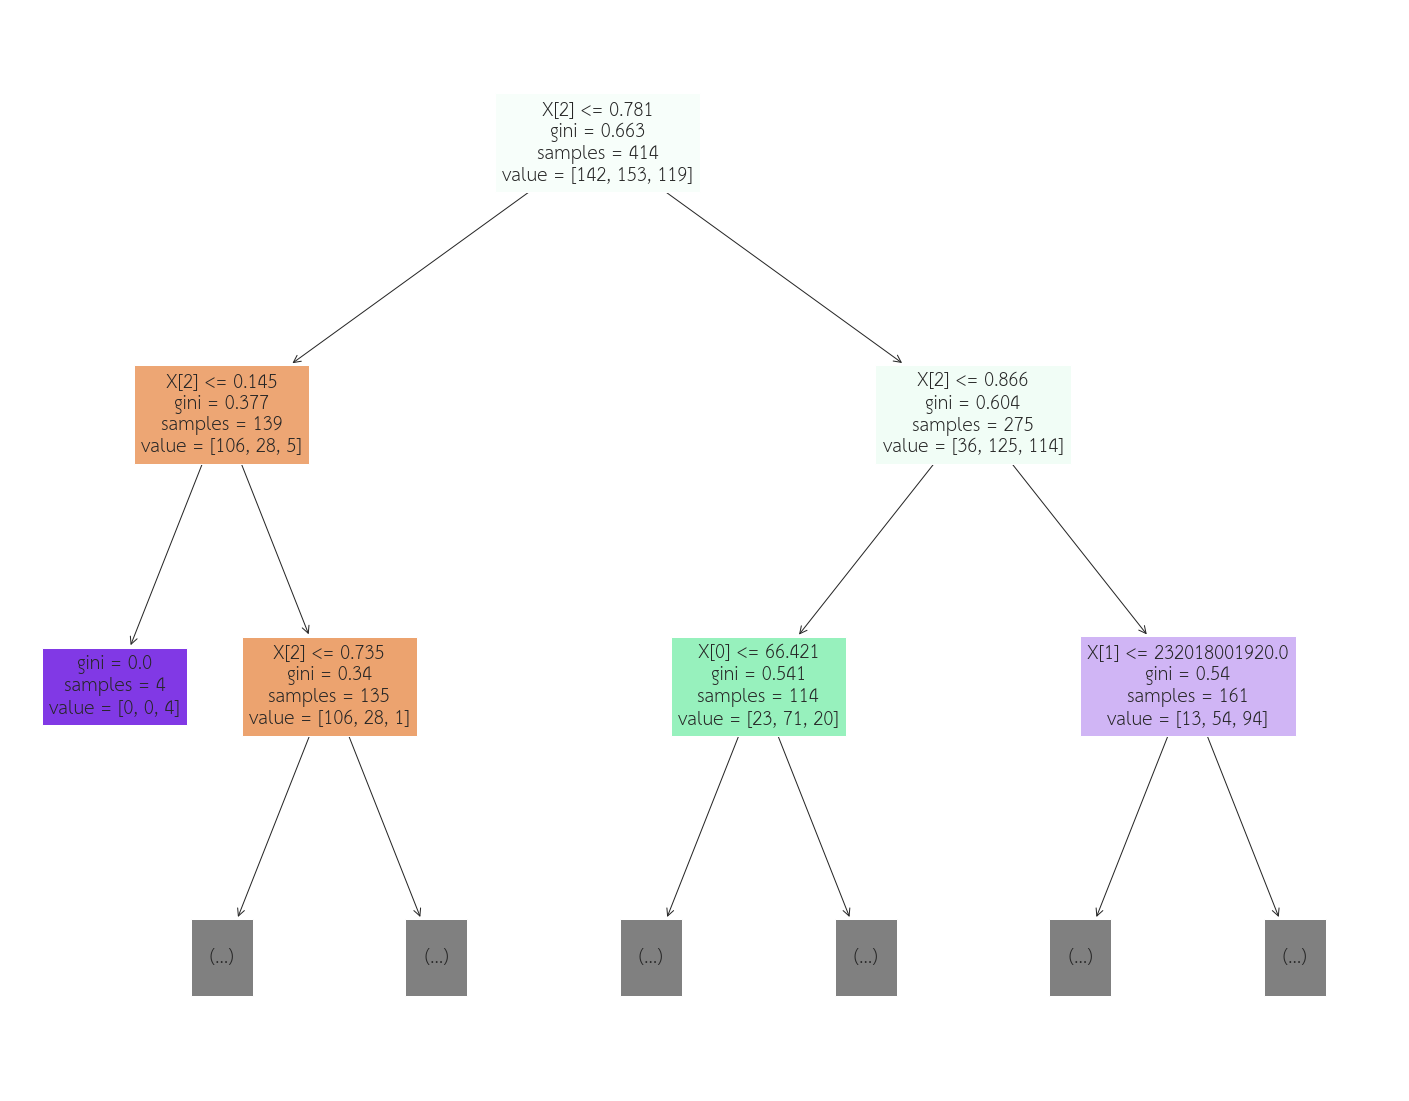

In [22]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model, max_depth=2,filled=True)
plt.show()

In [23]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 1, 2, 0, 2, 2, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2,
       0, 0, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2,
       1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 1,
       1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 1, 2,
       0, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2])

In [24]:
print(confusion_matrix(y_test,y_predicted))

[[38  8  2]
 [13 24 12]
 [ 2 15 29]]


In [25]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75        48
           1       0.51      0.49      0.50        49
           2       0.67      0.63      0.65        46

    accuracy                           0.64       143
   macro avg       0.63      0.64      0.63       143
weighted avg       0.63      0.64      0.63       143

